In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import time

plt.style.use('seaborn')

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


consumer_key = os.getenv("bot_consumer_key")
consumer_secret = os.getenv("bot_consumer_secret")
access_token = os.getenv("bot_access_token")
access_token_secret = os.getenv("bot_access_token_secret")


In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
def parse_requests(tweet, tweet_dict=dict()):
    tweet_data = []
    tweet_id = tweet["id"]
    tweet_user = tweet["user"]["screen_name"]
    tweet_requests = []
    print(tweet_id)
    for mentions in tweet["entities"]["user_mentions"]:
        if mentions["screen_name"] != "PySentiBot":
            tweet_requests.append(mentions["screen_name"])
    
    tweet_dict = {"id":tweet_id,"user":tweet_user,"analysis_requests":tweet_requests}
    return tweet_dict

In [19]:
def analyze_sentiments(recent_tweets, sentiment_results=list()):
    sentiment_results = []
    for tweet in recent_tweets:
        new_tweet = cleanse_tweet(tweet)
        sentiment_result = analyzer.polarity_scores(new_tweet["text"])
        sentiment_results.append(sentiment_result)    
    return sentiment_results

In [20]:
def remove_noise(tweet, category, key, result_tweet=dict()):
    try:
        result_tweet = tweet
        tweet_text = tweet.get("text")
        tweet_items = tweet.get("entities").get(category)
        for item in tweet_items:
            replace_str = item[key]
            tweet_text = tweet_text.replace(replace_str," ")
        result_tweet["text"] = tweet_text
    except TypeError:
        pass
    return result_tweet

def cleanse_tweet(tweet,result_tweet=dict()):
    result_tweet = tweet
    result_tweet = remove_noise(result_tweet,"user_mentions","screen_name")
    result_tweet = remove_noise(result_tweet,"urls","url")
    result_tweet = remove_noise(result_tweet,"media","url")
    result_tweet["text"] = result_tweet["text"].replace("@","")
    return result_tweet

In [23]:
def color_map(value):
    if(value >= 0): 
        return 'g'
    else:
        return 'r'

def plot_sentiments(title,sentiments):
    df = pd.DataFrame(sentiments)
    df = df.reset_index()
#     df.plot(kind="scatter",x="index",y="compound",marker="o")
    df.plot( 'index', 'compound', linestyle='-', marker='o',alpha=0.75)
    plt.ylabel("Sentiment score")
    plt.xlabel("Tweets")
    plt.title(title)
    
    filename = "SentimentAnalysis_of_"+title+".png"
    plt.savefig(filename)
    
    return filename  

In [27]:
def scan_for_requests(since_tweet_id):
    search_handle = "@PySentiBot"

    results = api.search(search_handle,since_id = since_tweet_id)

    if(len(results["statuses"]) > 0):
        tweet_data = []

        for tweet in results["statuses"]:
            tweet_data.append(parse_requests(tweet))
        
        for item in tweet_data:

            recent_tweets = []

            for analyze_request in item["analysis_requests"]:

                recent_tweets = api.user_timeline(analyze_request,count=200)

                if(len(recent_tweets) > 0):
                    sentiments = analyze_sentiments(recent_tweets)
                    print(sentiments)
                    sentiment_fig = plot_sentiments(analyze_request,sentiments)
                    text_status = f"TRY:11_23:11_30 Thank you for your tweet @{item['user']}! Here is the sentiment analysis of {analyze_request}!"
                    api.update_with_media(filename=sentiment_fig,status=text_status,in_reply_to_status_id=item["id"])
                else:
                    text_status = f"TRY:11_23:11_30 Thank you for your tweet @{item['user']}! Sorry, {analyze_request} has no tweets!" 
                    api.update_status(text_status)

                plt.show()
        return results["statuses"][0]["id"]
    else:
        return since_tweet_id

933930946721648641
933930057860599809
933929308753719296
933752497436610560
933745253638696962
932152929573834753
[{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.5859}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4939}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

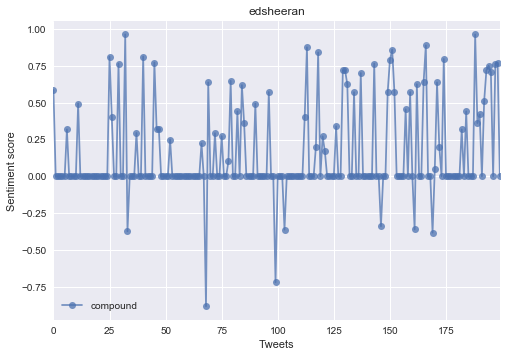

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5411}, {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'compound': 0.7418}, {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.2584}, {'neg': 0.0, 'neu': 0.223, 'pos': 0.777, 'compound': 0.5411}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6239}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.1531}, {'neg': 

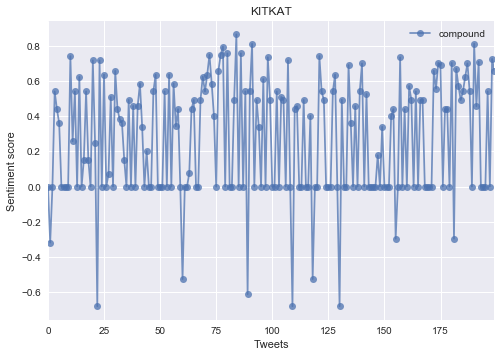

[{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.8588}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.8074}, {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}, {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}, {'neg': 0.148, 'neu': 0.742, 'pos': 0.109, 'compound': 0.0258}, {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}, {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.8519}, {'neg': 0.237, 'neu': 0.619, 'pos': 0.144, 'compound': -0.4199}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.3612}, {'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'compound': -0.4019}, {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.4019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.727, 'pos': 0.27

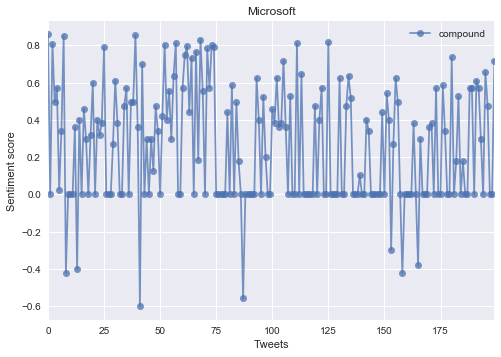

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.5574}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.3252}, {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}, {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.6369}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.241, 'n

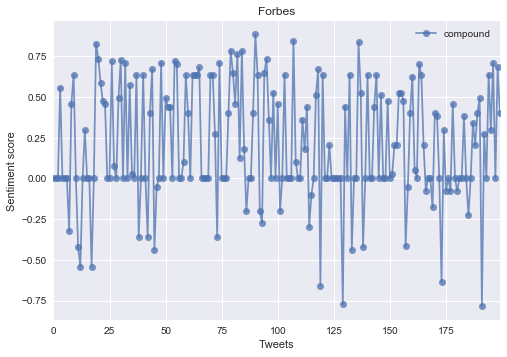

[{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}, {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}, {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}, {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}, {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.7177}, {'neg': 0.286, 'neu': 0.498, 'pos': 0.216, 'compound': 0.0842}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'compound': 0.8932}, {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.3244}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.373, 'pos': 0.627, 'compound': 0.8774}, {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.8583}, {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}, {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.6114}, {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.6468}, {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.8794}, {'neg': 0.0, 'neu':

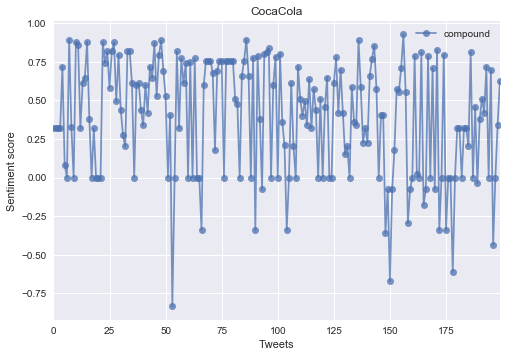

[{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.4404}, {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3818}, {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'compound': -0.5106}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.6369}, {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.7717}, {'neg': 0.399, 'neu': 0.601, 'pos': 0.0, 'compound': -0.6113}, {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.25}, {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.167, 'neu': 0.699, 'pos': 0.134, 'compound': -0.1531}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34}, {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}, {'neg': 0.202, 'neu': 0.798, '

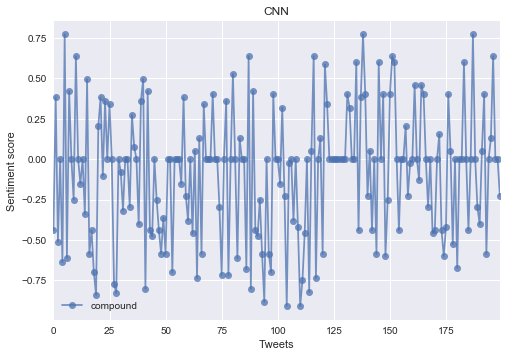

[{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.4404}, {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3818}, {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'compound': -0.5106}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.6369}, {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.7717}, {'neg': 0.399, 'neu': 0.601, 'pos': 0.0, 'compound': -0.6113}, {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.25}, {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.167, 'neu': 0.699, 'pos': 0.134, 'compound': -0.1531}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34}, {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}, {'neg': 0.202, 'neu': 0.798, '

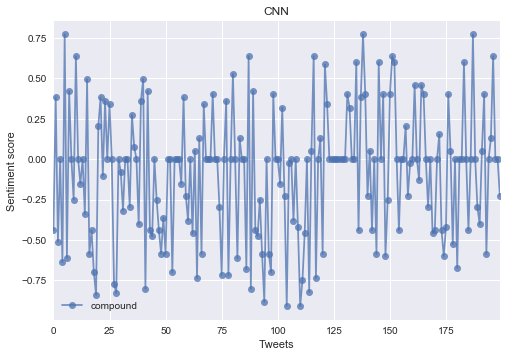

933930946721648641

In [28]:
scan_for_requests(0)